# EDA

## Scope
Get familiar with the _King County Housing Data_ and perform an **Exploratory Data Analysis** (EDA) with focus on the following particular requests by the stakeholder.

The stakeholder:
Nicole Johnson, buyer, who seeks for a "Lively, central neighborhood, middle price range, right timing (within a year)"

# Table of Content
1) Import and first impression of the dataset
2) Initial Hypotheses about the Dataset
3) Explore and clean the dataset



## 1) Import and first impression of the dataset

In [79]:
# import the necessary libraries we need for your analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [80]:
# import dataset
df = pd.read_csv('data/King_County_House_prices_dataset.csv', parse_dates=['date'])
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [81]:
# So, what size does the dataset has?
print("\n")
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
print("\n")

# Now, let us take a view to the columns and their type:
df.info()



The dataset has 21597 rows and 21 columns.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 no

- For most of the columns the dtype looks reasonable except for _sqft_basement_ which is of type "object", but we expect it to be a "float"
- For _waterfront_ we see that it is a "float64" and not boolean as we might have thought. So, lets have a quick view:

In [82]:
df.waterfront.unique()


array([nan,  0.,  1.])

We see, rather than TRUE/FALSE the columns has already been one-hot encoded and contains 0/1 as well as nan.

Speaking of nan, how many nan do we have in each column?

In [83]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Except for _waterfront_, _yr_renovated_ and _view_ the variables (i.e. columns) are **complete**.
But, let us check wether there are any duplications or multiple entries which need to be cleaned.

In [84]:
df["id"].duplicated().value_counts()

False    21420
True       177
Name: id, dtype: int64

Indeed, the _id_ which is unique for each house has 177 duplications. So are there really duplications of complete rows or does the house id just occur more than once? (For example indicating that a house has been bought and sold several times within the given time period) 

In [85]:
df.duplicated().unique()

array([False])

As there is not a single TRUE value, there are no duplications of complete rows. So, for now we will keep them. <br>
Lastly, we will take a brief view on some basic descriptive statistical parameters for each variable:

In [86]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Additionally, lets visualise some variables of the table which might be of special interest for our purpose (i.e. the requests of the stakeholder):
- the price
- the living and overall size
- the year built

<AxesSubplot:>

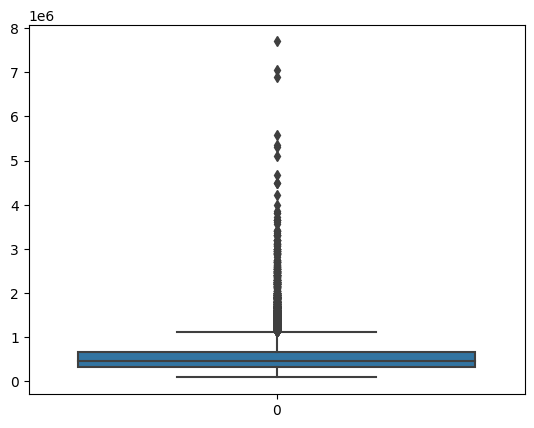

In [87]:
# Price [USD]
sns.boxplot(data=df.price)

<AxesSubplot:>

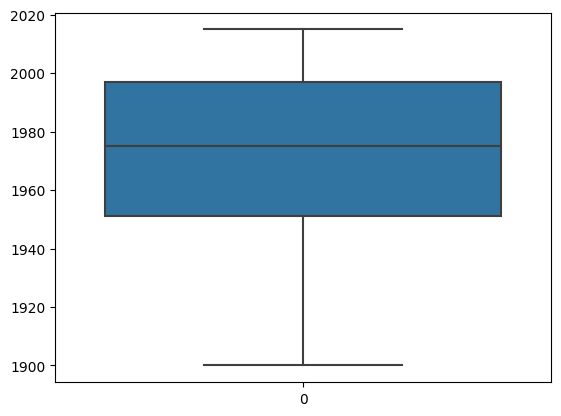

In [88]:
# Year built
sns.boxplot(data=df.yr_built)

<AxesSubplot:>

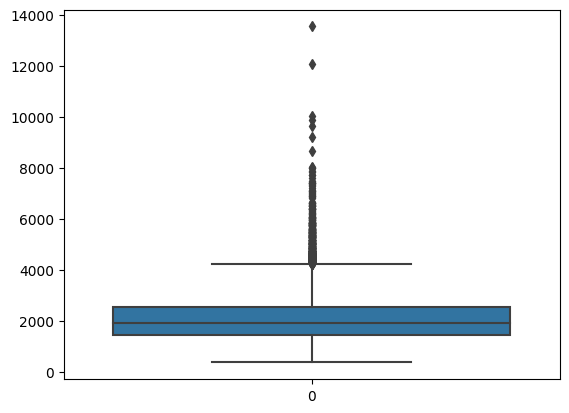

In [89]:
# footage size: living [feet squared]
sns.boxplot(data=df['sqft_living'])

<AxesSubplot:>

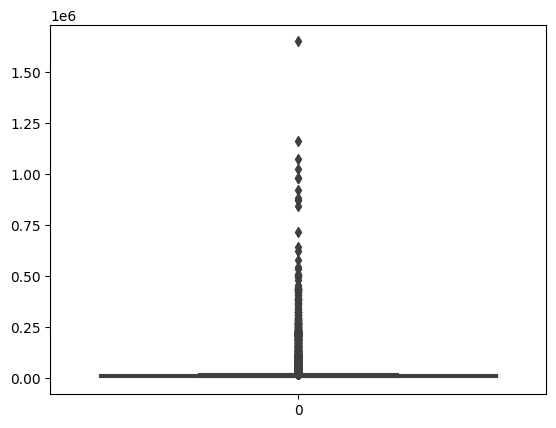

In [90]:
# footage size: lot [feet squared]
sns.boxplot(data=df['sqft_lot'])

For the chosen variables, _price_, _sqft_living_ and _sqft_lot_ appear to be right skewed distributed.

## 2) Initial Hypotheses about the Dataset

Hypotheses related to the stakeholder: <br>
To buy a central neighborhood house in middle price range with right timing (within a year) it will
- H1) be older than 50 years and has not been renovated in the last 25 years or
- H2) have a below-average grade or
- H3) have a below-average livingsquare

## 3) Explore and clean the dataset



### Add/remove columns

In [91]:
# As we want to know the right timing of buying within a year, we generate a 'month' column
df['month'] = df.date.dt.month

# Add prices for lot and living as prices per squarefeet
df['sqft_lot_per_sqft'] = df['sqft_lot'] / df['price']
df['sqft_living_per_sqft'] = df['sqft_living'] / df['price']

# For our purpose, we don't need sqft_above and sqft_basement, as these add up to sqft_living and we are only interested 
# in the overall size of the living area and overall lot size.
df.drop(['sqft_above','sqft_basement'], axis=1, inplace=True)

In [92]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,sqft_lot_per_sqft,sqft_living_per_sqft
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,10,0.025462,0.005318
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,0.013461,0.004777
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,NaN,98028,47.7379,-122.233,2720,8062,2,0.055556,0.004278
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,12,0.008278,0.003245
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,2,0.015843,0.003294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,2009,0.0,98103,47.6993,-122.346,1530,1509,5,0.003142,0.004250
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,2014,0.0,98146,47.5107,-122.362,1830,7200,2,0.014533,0.005775
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,2009,0.0,98144,47.5944,-122.299,1020,2007,6,0.003357,0.002537
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,2004,0.0,98027,47.5345,-122.069,1410,1287,1,0.005970,0.004000
